In [1]:
import librosa # importar a libreria librosa
import numpy as np
from scipy.io import wavfile 
import scipy.io.wavfile as waves
import matplotlib
import matplotlib.pyplot as plt #Libreria para realizar graficos
import wave 
import sounddevice as sd 
import soundfile as sf
import time as tiempo
import statsmodels.api as sm
from scipy.signal import find_peaks
import pyaudio



ModuleNotFoundError: No module named 'librosa'

In [3]:
acumulador = 0

In [4]:
hzInicialFa = 21.826
hzInicialFaS = 23.125
hzInicialSol = 24.50
hzInicialSolS = 25.96
hzInicialLa = 27.50
hzInicialLaS = 29.14
hzInicialSi = 30.87
hzInicialDo = 32.7
hzInicialDoS = 34.65
hzInicialRe = 36.71
hzInicialReS = 38.89
hzInicialMi = 41.2


In [5]:
#---Llenado Do---#

Do = np.array([0], dtype=float)

Do = np.append(Do, hzInicialDo, axis=None)

for i in [2,3,4,5,6,7,8]:
  Do = np.append(Do, Do[(i-1)]*2)

#---Llenado DoS---#

DoS = np.array([0], dtype=float)

DoS = np.append(DoS, hzInicialDoS, axis=None)

for i in [2,3,4,5,6,7,8]:
  DoS = np.append(DoS, DoS[(i-1)]*2)

#---Llenado Re---#  

Re = np.array([0], dtype=float)

Re = np.append(Re, hzInicialRe, axis=None)

for i in [2,3,4,5,6,7,8]:
  Re = np.append(Re, Re[(i-1)]*2)

#---Llenado ReS---#  

ReS = np.array([0], dtype=float)

ReS = np.append(ReS, hzInicialReS, axis=None)

for i in [2,3,4,5,6,7,8]:
  ReS = np.append(ReS, ReS[(i-1)]*2)

#---Llenado Mi---#  

Mi = np.array([0], dtype=float)

Mi = np.append(Mi, hzInicialMi, axis=None)

for i in [2,3,4,5,6,7,8]:
  Mi = np.append(Mi, Mi[(i-1)]*2)

#---Llenado Fa---#  

Fa = np.array([hzInicialFa], dtype=float)

for i in [1,2,3,4,5,6,7,8]:
  Fa = np.append(Fa, Fa[(i-1)]*2)

#---Llenado FaS---#  

FaS = np.array([hzInicialFaS], dtype=float)

for i in [1,2,3,4,5,6,7,8]:
  FaS = np.append(FaS, FaS[(i-1)]*2)

#---Llenado Sol---#  

Sol = np.array([hzInicialSol], dtype=float)

for i in [1,2,3,4,5,6,7,8]:
  Sol = np.append(Sol, Sol[(i-1)]*2)

#---Llenado SolS---#  

SolS = np.array([hzInicialSolS], dtype=float)

for i in [1,2,3,4,5,6,7]:
  SolS = np.append(SolS, SolS[(i-1)]*2)
SolS = np.append(SolS, 0)

#---Llenado La---#  

La = np.array([hzInicialLa], dtype=float)

for i in [1,2,3,4,5,6,7]:
  La = np.append(La, La[(i-1)]*2)
La = np.append(La, 0)

#---Llenado LaS---#  

LaS = np.array([hzInicialLaS], dtype=float)

for i in [1,2,3,4,5,6,7]:
  LaS = np.append(LaS, LaS[(i-1)]*2)
LaS = np.append(LaS, 0)

#---Llenado Si---#  

Si = np.array([hzInicialSi], dtype=float)

for i in [1,2,3,4,5,6,7]:
  Si = np.append(Si, Si[(i-1)]*2)
Si = np.append(Si, 0)

In [6]:
print("hz de DO:", Do)
print("hz de DO#:",DoS)
print("hz de RE:",Re)
print("hz de RE#:",ReS)
print("hz de MI:",Mi)
print("hz de FA:",Fa)
print("hz de FA#:",FaS)
print("hz de SOL:",Sol)
print("hz de SOL#:",SolS)
print("hz de LA:",La)
print("hz de LA#:",LaS)
print("hz de SI:",Si)


hz de DO: [   0.    32.7   65.4  130.8  261.6  523.2 1046.4 2092.8 4185.6]
hz de DO#: [   0.     34.65   69.3   138.6   277.2   554.4  1108.8  2217.6  4435.2 ]
hz de RE: [   0.     36.71   73.42  146.84  293.68  587.36 1174.72 2349.44 4698.88]
hz de RE#: [   0.     38.89   77.78  155.56  311.12  622.24 1244.48 2488.96 4977.92]
hz de MI: [   0.    41.2   82.4  164.8  329.6  659.2 1318.4 2636.8 5273.6]
hz de FA: [  21.826   43.652   87.304  174.608  349.216  698.432 1396.864 2793.728
 5587.456]
hz de FA#: [  23.125   46.25    92.5    185.     370.     740.    1480.    2960.
 5920.   ]
hz de SOL: [  24.5   49.    98.   196.   392.   784.  1568.  3136.  6272. ]
hz de SOL#: [  25.96   51.92  103.84  207.68  415.36  830.72 1661.44 3322.88    0.  ]
hz de LA: [  27.5   55.   110.   220.   440.   880.  1760.  3520.     0. ]
hz de LA#: [  29.14   58.28  116.56  233.12  466.24  932.48 1864.96 3729.92    0.  ]
hz de SI: [  30.87   61.74  123.48  246.96  493.92  987.84 1975.68 3951.36    0.  ]


In [7]:
doDo = {'Do':Do}
doDoS = {'Do#':DoS}
reRe = {'Re':Re}
reReS = {'Re#':ReS}
miMi = {'Mi':Mi}
faFa = {'Fa':Fa}
faFaS = {'Fa#':FaS}
solSol = {'Sol':Sol}
solSolS = {'Sol#':SolS}
laLa = {'La':La}
laLaS = {'La#':LaS}
siSi = {'Si':Si}
HZ = np.array([Do, DoS, Re, ReS, Mi, Fa, FaS, Sol, SolS, La, LaS, Si], dtype=float)
print(HZ)
#print(doDo, doDoS, reRe, reReS, miMi, faFa, faFaS, solSol, solSolS, laLa, laLaS, siSi)
HZ2 = np.array([doDo, doDoS, reRe, reReS, miMi, faFa, faFaS, solSol, solSolS, laLa, laLaS, siSi], dtype=dict)

#nombreNotas[0] corresponde a "Do", por ende al referirnos a la nota "0" siendo este "0" un valor entero, refereciaremos un "Do"
nombreNota = np.array(['Do','Do#','Re','Re#','Mi','Fa','Fa#','Sol','Sol#','La','La#','Si'], dtype = str)

AllHz = np.array([], dtype=float)
for notaIndice in [0,1,2,3,4,5,6,7,8,9,10,11]:
    for octavaIndice in [0,1,2,3,4,5,6,7,8]:
        notaAux = HZ[notaIndice]
        AllHz = np.append(AllHz, notaAux[octavaIndice])

[[   0.      32.7     65.4    130.8    261.6    523.2   1046.4   2092.8
  4185.6  ]
 [   0.      34.65    69.3    138.6    277.2    554.4   1108.8   2217.6
  4435.2  ]
 [   0.      36.71    73.42   146.84   293.68   587.36  1174.72  2349.44
  4698.88 ]
 [   0.      38.89    77.78   155.56   311.12   622.24  1244.48  2488.96
  4977.92 ]
 [   0.      41.2     82.4    164.8    329.6    659.2   1318.4   2636.8
  5273.6  ]
 [  21.826   43.652   87.304  174.608  349.216  698.432 1396.864 2793.728
  5587.456]
 [  23.125   46.25    92.5    185.     370.     740.    1480.    2960.
  5920.   ]
 [  24.5     49.      98.     196.     392.     784.    1568.    3136.
  6272.   ]
 [  25.96    51.92   103.84   207.68   415.36   830.72  1661.44  3322.88
     0.   ]
 [  27.5     55.     110.     220.     440.     880.    1760.    3520.
     0.   ]
 [  29.14    58.28   116.56   233.12   466.24   932.48  1864.96  3729.92
     0.   ]
 [  30.87    61.74   123.48   246.96   493.92   987.84  1975.68  3951.36


In [8]:
print(len(AllHz))
largo = len(AllHz)
print(AllHz[3])
HzSinDuplicas = np.array([], dtype=float)

108
130.8


In [9]:
for i in range(largo):
    if AllHz[i] not in HzSinDuplicas: HzSinDuplicas = np.append(HzSinDuplicas, AllHz[i])
    

In [10]:
print(HzSinDuplicas)

[   0.      32.7     65.4    130.8    261.6    523.2   1046.4   2092.8
 4185.6     34.65    69.3    138.6    277.2    554.4   1108.8   2217.6
 4435.2     36.71    73.42   146.84   293.68   587.36  1174.72  2349.44
 4698.88    38.89    77.78   155.56   311.12   622.24  1244.48  2488.96
 4977.92    41.2     82.4    164.8    329.6    659.2   1318.4   2636.8
 5273.6     21.826   43.652   87.304  174.608  349.216  698.432 1396.864
 2793.728 5587.456   23.125   46.25    92.5    185.     370.     740.
 1480.    2960.    5920.      24.5     49.      98.     196.     392.
  784.    1568.    3136.    6272.      25.96    51.92   103.84   207.68
  415.36   830.72  1661.44  3322.88    27.5     55.     110.     220.
  440.     880.    1760.    3520.      29.14    58.28   116.56   233.12
  466.24   932.48  1864.96  3729.92    30.87    61.74   123.48   246.96
  493.92   987.84  1975.68  3951.36 ]


In [11]:
print(len(HzSinDuplicas))
largo = len(HzSinDuplicas)
print(HzSinDuplicas[3])

100
130.8


In [12]:
HzOrdenado = np.array([], dtype=float)

HzOrdenado = np.sort(HzSinDuplicas)

print(HzOrdenado)


[   0.      21.826   23.125   24.5     25.96    27.5     29.14    30.87
   32.7     34.65    36.71    38.89    41.2     43.652   46.25    49.
   51.92    55.      58.28    61.74    65.4     69.3     73.42    77.78
   82.4     87.304   92.5     98.     103.84   110.     116.56   123.48
  130.8    138.6    146.84   155.56   164.8    174.608  185.     196.
  207.68   220.     233.12   246.96   261.6    277.2    293.68   311.12
  329.6    349.216  370.     392.     415.36   440.     466.24   493.92
  523.2    554.4    587.36   622.24   659.2    698.432  740.     784.
  830.72   880.     932.48   987.84  1046.4   1108.8   1174.72  1244.48
 1318.4   1396.864 1480.    1568.    1661.44  1760.    1864.96  1975.68
 2092.8   2217.6   2349.44  2488.96  2636.8   2793.728 2960.    3136.
 3322.88  3520.    3729.92  3951.36  4185.6   4435.2   4698.88  4977.92
 5273.6   5587.456 5920.    6272.   ]


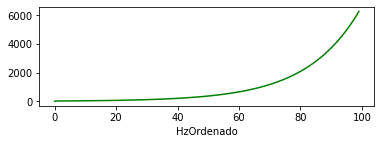

In [13]:
plt.xlim(1, 12)
plt.xlim(0, 4000)
plt.figure(1) 
plt.subplot(2,1,1)  
plt.plot(HzOrdenado,c="g")  
plt.xlabel("HzOrdenado")  
plt.show() 

In [14]:
9*12

108

In [15]:
#NOTAS REDONDEADAS A MAS CERCANO, 4 < entonces hacia abajo, > 4 hacia arriba.

doRedondeado = np.array([], dtype=float)

for i in {0,1,2,3,4,5,6,7,8}:
    valorDoRedondeado = round(Do[i])
    doRedondeado = np.append(doRedondeado, valorDoRedondeado)
print(doRedondeado,Do)

FaRedondeado = np.array([], dtype=float)

for i in {0,1,2,3,4,5,6,7,8}:
    valorFaRedondeado = round(Fa[i])
    FaRedondeado = np.append(FaRedondeado, valorFaRedondeado)
print(FaRedondeado,Fa)

hzRedondeado = np.array([], dtype=float)

for i in range(len(HzOrdenado)):
    valorHzRedondeado = round(HzOrdenado[i])
    hzRedondeado = np.append(hzRedondeado, valorHzRedondeado)
print(hzRedondeado)

[   0.   33.   65.  131.  262.  523. 1046. 2093. 4186.] [   0.    32.7   65.4  130.8  261.6  523.2 1046.4 2092.8 4185.6]
[  22.   44.   87.  175.  349.  698. 1397. 2794. 5587.] [  21.826   43.652   87.304  174.608  349.216  698.432 1396.864 2793.728
 5587.456]
[   0.   22.   23.   24.   26.   28.   29.   31.   33.   35.   37.   39.
   41.   44.   46.   49.   52.   55.   58.   62.   65.   69.   73.   78.
   82.   87.   92.   98.  104.  110.  117.  123.  131.  139.  147.  156.
  165.  175.  185.  196.  208.  220.  233.  247.  262.  277.  294.  311.
  330.  349.  370.  392.  415.  440.  466.  494.  523.  554.  587.  622.
  659.  698.  740.  784.  831.  880.  932.  988. 1046. 1109. 1175. 1244.
 1318. 1397. 1480. 1568. 1661. 1760. 1865. 1976. 2093. 2218. 2349. 2489.
 2637. 2794. 2960. 3136. 3323. 3520. 3730. 3951. 4186. 4435. 4699. 4978.
 5274. 5587. 5920. 6272.]


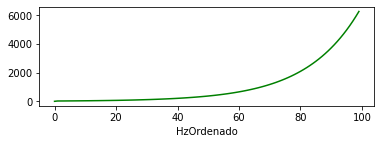

In [16]:
plt.xlim(1, 12)
plt.xlim(0, 4000)
plt.figure(1) 
plt.subplot(2,1,1)  
plt.plot(hzRedondeado,c="g")  
plt.xlabel("HzOrdenado")  
plt.show() 

In [17]:
print(f'Version de Librosa: {librosa.__version__}')

Version de Librosa: 0.9.1


In [18]:
x, sr = librosa.load('La_440hz.wav',sr=None) 
#Si no se especifica sr=None, entonces el audio se cambia de sampling a 22050
# automaticamente carga el audio como un float
print(f'Tamaño del archivo de audio = {x.shape}, Frecuencia de Muestreo = {sr} y tipo de dato = {x.dtype}')

Tamaño del archivo de audio = (2886148,), Frecuencia de Muestreo = 48000 y tipo de dato = float32


Text(0.5, 1.0, 'Señal de Audio sin valores adecuados en los ejes')

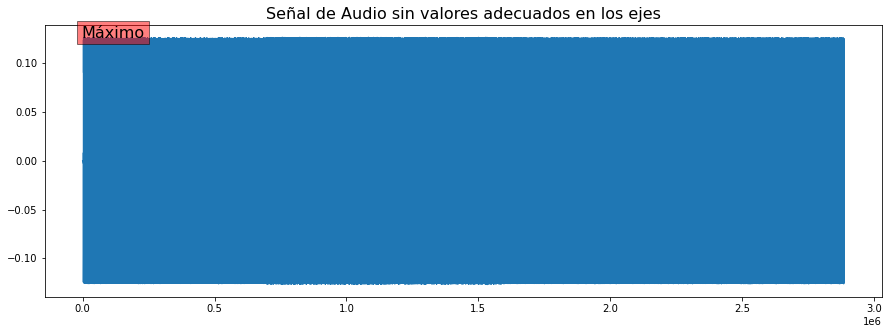

In [19]:
plt.rcParams['figure.figsize'] = (15, 5) # Definir el tamaño de graficas
plt.plot(x) # Audiodata es un numpy array
plt.text(0-5000, np.max(x), 'Máximo', fontsize = 16,bbox=dict(facecolor='red', alpha=0.5))
plt.title('Señal de Audio sin valores adecuados en los ejes',size=16)

In [20]:
archivo = 'La_440hz.wav'
fsonido, sonido = waves.read(archivo)

In [21]:
print(fsonido, sonido)

48000 [[    0     0]
 [    0     0]
 [    0     0]
 ...
 [-3392 -3392]
 [-3743 -3743]
 [-3120 -3120]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_25948\904412917.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data,dtype = np.short)


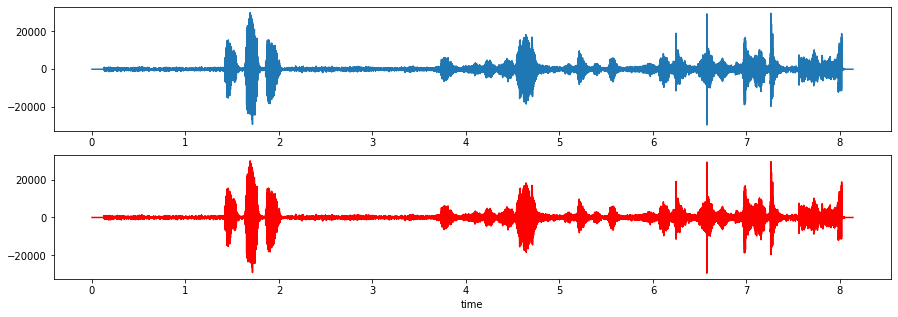

In [22]:
# Abra el archivo wav, abrir devuelve una instancia de la clase Wave_read y lee el formato y los datos del archivo WAV llamando a su método.
f = wave.open(r"elpepe.wav","rb")
# Leer información de formato  
# Devuelva la información de formato de todos los archivos WAV a la vez. Devuelve una tupla: el número de canales, el número de bits de cuantización (unidades de bytes) y el  
# Frecuencia de muestreo, número de puntos de muestreo, tipo de compresión, descripción del tipo de compresión. El módulo de onda solo admite datos sin comprimir, por lo que los dos últimos mensajes pueden ignorarse
params = f.getparams()  
nchannels, sampwidth, framerate, nframes = params[:4]
# Leer datos de forma de onda  
#Lea los datos de sonido, pase un parámetro para especificar la longitud a leer (en puntos de muestra)  
str_data  = f.readframes(nframes)  
f.close()
#Convierta los datos de forma de onda en una matriz
# Es necesario convertir los datos binarios leídos en una matriz que se pueda calcular de acuerdo con el número de canales y la unidad de cuantificación  
wave_data = np.fromstring(str_data,dtype = np.short)
# Cambie la matriz wave_data a 2 columnas, y el número de filas coincidirá automáticamente. Al modificar las propiedades de la forma, la longitud total de la matriz no debe modificarse.
wave_data.shape = -1,2
# Transponer datos
wave_data = wave_data.T
# Calcule el tiempo de cada muestreo por puntos de muestreo y frecuencia de muestreo.
time=np.arange(0,nframes)/framerate
#print(params)  
plt.figure(1) 
plt.subplot(2,1,1)  
#time también es una matriz, emparejada con wave_data [0] o wave_data [1] para formar una serie de coordenadas de puntos
plt.plot(time,wave_data[0])  
plt.subplot(2,1,2)  
plt.plot(time,wave_data[1],c="r")  
plt.xlabel("time")  
plt.show() 

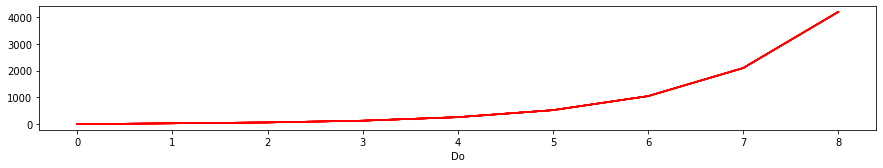

In [23]:
plt.xlim(1, 12)
plt.ylim(0, 4000)
plt.figure(1) 
plt.subplot(2,1,1)  

for i in [0,1,2,3,4,5,6,7] :
    plt.plot(Do,c="r") 
 
plt.xlabel("Do")  
plt.show() 


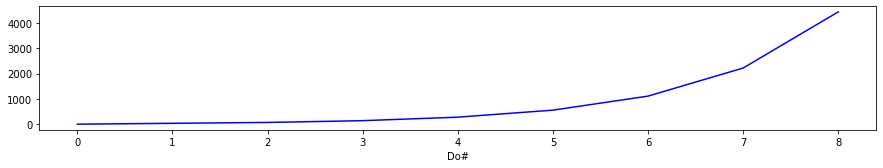

In [24]:
plt.xlim(1, 12)
plt.xlim(0, 4000)
plt.figure(1) 
plt.subplot(2,1,1)  
plt.plot(DoS,c="b")  
plt.xlabel("Do#")  
plt.show() 

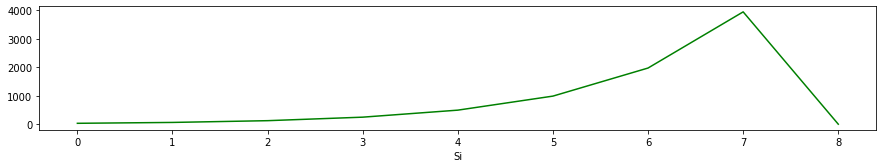

In [25]:
plt.xlim(1, 12)
plt.xlim(0, 4000)
plt.figure(1) 
plt.subplot(2,1,1)  
plt.plot(Si,c="g")  
plt.xlabel("Si")  
plt.show() 

In [26]:
# Abra el archivo wav, abrir devuelve una instancia de la clase Wave_read y lee el formato y los datos del archivo WAV llamando a su método.
f = wave.open(r"La_440hz.wav","rb")
# Leer información de formato  
# Devuelva la información de formato de todos los archivos WAV a la vez. Devuelve una tupla: el número de canales, el número de bits de cuantización (unidades de bytes) y el  
# Frecuencia de muestreo, número de puntos de muestreo, tipo de compresión, descripción del tipo de compresión. El módulo de onda solo admite datos sin comprimir, por lo que los dos últimos mensajes pueden ignorarse
params = f.getparams()  
nchannels, sampwidth, framerate, nframes = params[:4]
# Leer datos de forma de onda  
#Lea los datos de sonido, pase un parámetro para especificar la longitud a leer (en puntos de muestra)  
str_data  = f.readframes(nframes)  
f.close()

wave_data = np.fromstring(str_data,dtype = np.short)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25948\4157936555.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data,dtype = np.short)


In [27]:
def reproducirArchivo (filename):
  data, fs = sf.read(filename)
  sd.play(data, fs)
  return data, fs

In [47]:
file = "La_440hz.wav"
data, fs = reproducirArchivo(file)

print('SE ESTA REPRODUCCION')
tiempo.sleep(2)
print('reproduciendo: ', file)
tiempo.sleep(2)
sd.stop()
print("SE PARO LA WIA")

SE ESTA REPRODUCCION
reproduciendo:  La_440hz.wav
SE PARO LA WIA


In [29]:
data_int = np.frombuffer(data, dtype='h')
print(data_int)

[     0      0      0 ...      0  24576 -16456]


In [30]:
transformada = np.fft.fft(data)

In [31]:
chunk = 1024 * 2
Frecuencias = framerate * np.arange(chunk/2)/chunk
print(Frecuencias)

FrecuenciasMinimas = np.argmin(np.abs(Frecuencias - 40))

print(FrecuenciasMinimas)

dataTransformada = (np.abs(np.fft.fft(data_int))[0:int(np.floor(chunk/2))])/chunk

print(dataTransformada)

maxLocales = np.argmax(dataTransformada[FrecuenciasMinimas]) + FrecuenciasMinimas

print(maxLocales)

[0.00000000e+00 2.34375000e+01 4.68750000e+01 ... 2.39296875e+04
 2.39531250e+04 2.39765625e+04]
2
[3519300.47558594   93330.50990578   37673.31531069 ...   26976.02368867
   22191.54659236   27719.55717381]
2


In [32]:
print(Frecuencias[maxLocales])

46.875


In [33]:
#Definicion de funciones

def obtener_frecuencias(HZ, nota, nombreNota):
  print('Las frecuencias de la nota: ', nombreNota[nota], ' son: ', HZ[nota])

def obtener_valor_frecuencia(HZ, nota, octava):
    notaSeleccionada = HZ[nota]
    return notaSeleccionada[octava]

def obtener_frecuencia(HZ, nota, octava, nombreNota):
  notaSeleccionada = HZ[nota]
  print('La frecuencia de la nota: ', nombreNota[nota], ' en la octava: ', octava+1, ' es: ' , notaSeleccionada[octava])
  return notaSeleccionada[octava]

In [34]:
def obtener_nota(HZ, frecuencia, nombreNota):

    for i in {0,1,2,3,4,5,6,7,8,9,10,11}:
        notaAux = HZ[i]
       # print(notaAux)
        for j in {0,1,2,3,4,5,6,7,8}:
            notaOctava = notaAux[j]
            if frecuencia == notaOctava : print(nombreNota[i])

In [35]:
obtener_frecuencias(HZ, 0, nombreNota)
#Considerar que el 0 -> 1er octava, n -> (n+1), n < 9
frecuenciaNota = obtener_frecuencia(HZ, 0, 8, nombreNota)
#Se deben idear nuevas funciones: obtFrecuenciaArchivo(HZ, archivo) y obtFrecuenciaMicrofono(HZ, microfono)

Las frecuencias de la nota:  Do  son:  [   0.    32.7   65.4  130.8  261.6  523.2 1046.4 2092.8 4185.6]
La frecuencia de la nota:  Do  en la octava:  9  es:  4185.6


In [36]:
# La idea es obtener la frecuenciaNota de un archivo o desde el microfono.
obtener_nota(HZ, frecuenciaNota, nombreNota)

Do


In [37]:
def reproducir(nota, octava):
  framerate = 48000
  duracionNota = 1000 #milisegundos
  frecuencia = obtener_valor_frecuencia(HZ, nota, octava)
  amplitud = np.linspace(0, duracionNota/1000, int(framerate * duracionNota / 1000))

  print('nota', nombreNota[nota])
  onda = np.sin(2 * np.pi * frecuencia * amplitud)
  #print('grafica de', nombreNota[nota], frecuencia)
  #plt.plot(onda[:1000])
  #plt.xlabel('Tiempo')
  #plt.ylabel('Voltaje')
  #plt.show()

  sd.play(onda, framerate)
  sd.wait()


In [ ]:

for i in {0,1,2,3,4,5,6,7,8,9,10,11}:
       reproducir(i,4)

nota Do
amplitud 48000
nota Do#
amplitud 48000
nota Re
amplitud 48000
nota Re#
amplitud 48000
nota Mi
amplitud 48000
nota Fa
amplitud 48000
nota Fa#
amplitud 48000
nota Sol
amplitud 48000
nota Sol#
amplitud 48000
nota La
amplitud 48000
nota La#
amplitud 48000
nota Si
amplitud 48000


In [38]:
#---Llenado Do aproximacion---#

Do2 = np.array([0], dtype=int)

Do2 = np.append(Do2, round(hzInicialDo), axis=None)

for i in [2,3,4,5,6,7,8]:
    Do2 = np.append(Do2, Do2[(i-1)]*2)

    #---Llenado DoS---#

DoS2 = np.array([0], dtype=int)

DoS2 = np.append(DoS2, round(hzInicialDoS), axis=None)

for i in [2,3,4,5,6,7,8]:
  DoS2 = np.append(DoS2, DoS2[(i-1)]*2)

#---Llenado Re---#  

Re2 = np.array([0], dtype=int)

Re2 = np.append(Re2, round(hzInicialRe), axis=None)

for i in [2,3,4,5,6,7,8]:
  Re2 = np.append(Re2, Re2[(i-1)]*2)

#---Llenado ReS---#  

ReS2 = np.array([0], dtype=int)

ReS2 = np.append(ReS2, round(hzInicialReS), axis=None)

for i in [2,3,4,5,6,7,8]:
  ReS2 = np.append(ReS2, ReS2[(i-1)]*2)

#---Llenado Mi---#  

Mi2 = np.array([0], dtype=int)

Mi2 = np.append(Mi2, round(hzInicialMi), axis=None)

for i in [2,3,4,5,6,7,8]:
  Mi2 = np.append(Mi2, Mi2[(i-1)]*2)

#---Llenado Fa---#  
hzFa= round(hzInicialFa)
Fa2 = np.array([hzFa], dtype=int)

for i in [1,2,3,4,5,6,7,8]:
  Fa2 = np.append(Fa2, Fa2[(i-1)]*2)

#---Llenado FaS---#  
hzFaS2= round(hzInicialFaS)
FaS2 = np.array([hzFaS2], dtype=int)

for i in [1,2,3,4,5,6,7,8]:
  FaS2 = np.append(FaS2, FaS2[(i-1)]*2)

#---Llenado Sol---#  
hzSol= round(hzInicialSol)
Sol2 = np.array([hzSol], dtype=int)

for i in [1,2,3,4,5,6,7,8]:
  Sol2 = np.append(Sol2, Sol2[(i-1)]*2)

#---Llenado SolS---#  
hzSolS2= round(hzInicialSolS)
SolS2 = np.array([hzSolS2], dtype=int)

for i in [1,2,3,4,5,6,7]:
  SolS2 = np.append(SolS2, SolS2[(i-1)]*2)
SolS2 = np.append(SolS2, 0)

#---Llenado La---#  
hzLa= round(hzInicialLa)
La2 = np.array([hzLa], dtype=int)

for i in [1,2,3,4,5,6,7]:
  La2 = np.append(La2, La2[(i-1)]*2)
La2 = np.append(La2, 0)

#---Llenado LaS---#  
hzLaS2= round(hzInicialLaS)
LaS2 = np.array([hzLaS2], dtype=int)

for i in [1,2,3,4,5,6,7]:
  LaS2 = np.append(LaS2, LaS2[(i-1)]*2)
LaS2 = np.append(LaS2, 0)

#---Llenado Si---#  
hzSi2= round(hzInicialSi)
Si2 = np.array([hzSi2], dtype=int)

for i in [1,2,3,4,5,6,7]:
  Si2 = np.append(Si2, Si2[(i-1)]*2)
Si2 = np.append(Si2, 0)



In [39]:
HzRedondeado = np.array([Do2, DoS2, Re2, ReS2, Mi2, Fa2, FaS2, Sol2, SolS2, La2, LaS2, Si2], dtype=int)

In [40]:
print(HzRedondeado)

[[   0   33   66  132  264  528 1056 2112 4224]
 [   0   35   70  140  280  560 1120 2240 4480]
 [   0   37   74  148  296  592 1184 2368 4736]
 [   0   39   78  156  312  624 1248 2496 4992]
 [   0   41   82  164  328  656 1312 2624 5248]
 [  22   44   88  176  352  704 1408 2816 5632]
 [  23   46   92  184  368  736 1472 2944 5888]
 [  24   48   96  192  384  768 1536 3072 6144]
 [  26   52  104  208  416  832 1664 3328    0]
 [  28   56  112  224  448  896 1792 3584    0]
 [  29   58  116  232  464  928 1856 3712    0]
 [  31   62  124  248  496  992 1984 3968    0]]


In [43]:
# Load data and sampling frequency from the data file
data, sampling_frequency = librosa.load('Fa_174hz.wav')

# Get some useful statistics
T = 1/sampling_frequency # Sampling period
N = len(data) # Signal length in samples
t = N / sampling_frequency # Signal length in seconds

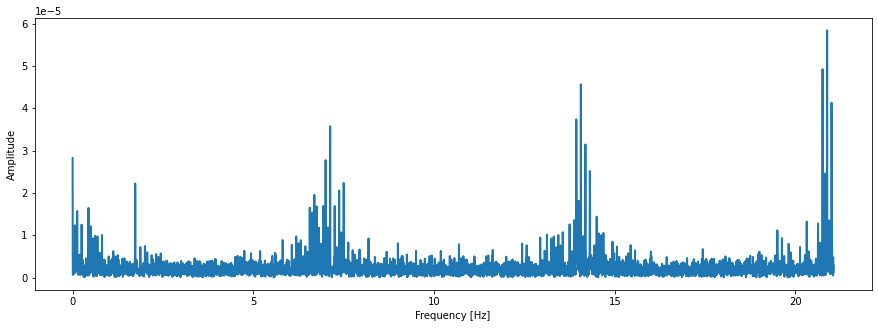

In [44]:
Y_k = np.fft.fft(data)[0:int(N/2)]/N # FFT
Y_k[1:] = 2*Y_k[1:] # Single-sided spectrum
Pxx = np.abs(Y_k) # Power spectrum

f = sampling_frequency * np.arange((N/2)) / N; # frequencies

# plotting
fig,ax = plt.subplots()
plt.plot(f[0:5000], Pxx[0:5000], linewidth=2)
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()

In [ ]:
auto = sm.tsa.acf(data, nlags=2000)

[1.         0.97920508 0.91839508 ... 0.08497412 0.09327384 0.09814435]


In [ ]:
peaks = find_peaks(auto)[0] # Find peaks of the autocorrelation
lag = peaks[0] # Choose the first peak as our pitch component lag

In [ ]:
picosDeFrecuencia = np.array([], dtype=float)
for i in range(len(peaks)):
    picosDeFrecuencia = np.append(picosDeFrecuencia, peaks[i])

In [ ]:
print(picosDeFrecuencia, len(picosDeFrecuencia))

[  27.   56.   92.  122.  157.  186.  214.  243.  272.  296.  320.  347.
  378.  409.  439.  467.  492.  508.  537.  566.  597.  620.  659.  686.
  712.  734.  761.  790.  818.  849.  882.  907.  931.  955.  982. 1010.
 1040. 1068. 1094. 1113. 1140. 1165. 1197. 1226. 1255. 1283. 1311. 1332.
 1354. 1382. 1411. 1437. 1476. 1503. 1532. 1558. 1589. 1626. 1655. 1684.
 1724. 1753. 1779. 1813. 1843. 1874. 1906. 1945. 1974.] 69


In [ ]:
lagDinamico = np.array([], dtype=float)
lagDinamico = picosDeFrecuencia
pitchMulti = np.array([], dtype=float)
for i in range(len(lagDinamico)):
    aux = int(sampling_frequency / lagDinamico[i])
    pitchMulti = np.append(pitchMulti, aux)

In [ ]:
print(pitchMulti, 'Hz')
print(len(pitchMulti))

[816. 393. 239. 180. 140. 118. 103.  90.  81.  74.  68.  63.  58.  53.
  50.  47.  44.  43.  41.  38.  36.  35.  33.  32.  30.  30.  28.  27.
  26.  25.  25.  24.  23.  23.  22.  21.  21.  20.  20.  19.  19.  18.
  18.  17.  17.  17.  16.  16.  16.  15.  15.  15.  14.  14.  14.  14.
  13.  13.  13.  13.  12.  12.  12.  12.  11.  11.  11.  11.  11.] Hz
69


In [ ]:
pitch = sampling_frequency / lag
print(pitch, 'Hz')
print(f)

816.6666666666666 Hz
[0.00000000e+00 3.39669727e-01 6.79339454e-01 ... 1.10239810e+04
 1.10243207e+04 1.10246603e+04]


In [ ]:
def obtenerNota(HzRedondeado, frecuencia, nombreNota):
    
    for i in {0,1,2,3,4,5,6,7,8,9,10,11}:
        frecuenciaAux = HzRedondeado[i]
        for j in {0,1,2,3,4,5,6,7,8}:
            frecuenciaOctava = frecuenciaAux[j]
            comprobacion = frecuenciaOctava - frecuencia
            if  comprobacion > 0 and comprobacion <= 10: print(nombreNota[i])
            else: 
                if comprobacion < 0 and comprobacion > -11: print(nombreNota[i])


In [ ]:
numero = pitch
redondeado = round(numero)
print(numero)
print(redondeado)

816.6666666666666
817


In [ ]:
def VecindadDe1 (HzRedondeado):
    for i in range(len(HzRedondeado)):
        notaSelect = HzRedondeado[i]
        for j in range(8):
            limInferior = notaSelect[j] - 1
            print(limInferior)
            limSuperior = notaSelect[j] + 1
            print(limSuperior)
            print(range(limInferior, limSuperior))
            print('centro: ', notaSelect[j])

def VecindadDe2 (HzRedondeado):
    for i in range(len(HzRedondeado)):
        notaSelect = HzRedondeado[i]
        for j in range(8):
            limInferior = notaSelect[j] - 1
            print(limInferior)
            limSuperior = notaSelect[j] + 1
            print(limSuperior)
            print(range(limInferior, limSuperior))
            print('centro: ', notaSelect[j])

def VecindadDe5 (HzRedondeado):
    for i in range(len(HzRedondeado)):
        notaSelect = HzRedondeado[i]
        for j in range(8):
            limInferior = notaSelect[j] - 5
            print(limInferior)
            limSuperior = notaSelect[j] + 5
            print(limSuperior)
            print(range(limInferior, limSuperior))
            print('centro: ', notaSelect[j])

In [ ]:
prueba = hzRedondeado
resuls = np.array([], dtype=int)
for i in range(0,len(prueba)):
    if i == 0 : resuls = np.append(resuls, prueba[i])
    else:
        resuls = np.append(resuls, prueba[i] - prueba[i-1])

def VecindadDinamica(HzRedondeado, pitchMulti):

    resuls = np.array([], dtype=int)

    for h in range(len(pitchMulti)):
        auxSuperior = pitchMulti[h]
        for i in range(12):
            aux = HzRedondeado[i]
            for j in range(8):
                resuls = np.append(resuls, aux[j] - auxSuperior)
    print(resuls)

In [ ]:
VecindadDinamica(HzRedondeado, pitchMulti)

[-816. -783. -750. ...  981. 1973. 3957.]


range(49, 51)


In [ ]:
#VALIDANDO VECINDADES

for i in range(len(pitchMulti)):
    if pitchMulti[i] < 22 : nombreNota[5]
    elif pitchMulti[i] == 25 : nombreNota[8]
    elif pitchMulti[i] == 27 : nombreNota[9]
    elif pitchMulti[i] == 30 : nombreNota[10]
    elif pitchMulti[i] == 32 : nombreNota[11]
    elif pitchMulti[i] == 34 : nombreNota[0]
    elif pitchMulti[i] == 36 : nombreNota[1]
    elif pitchMulti[i] == 38 : nombreNota[2]
    elif pitchMulti[i] == 40 : nombreNota[3]
    elif pitchMulti[i] == 42 : nombreNota[4]
    elif pitchMulti[i] == 45 : nombreNota[5]
    elif pitchMulti[i] == 47 : nombreNota[6]
    elif pitchMulti[i] == 49 or pitchMulti[i] == 50 : nombreNota[7]
    elif pitchMulti[i] == 51 or pitchMulti[i] == 53 or pitchMulti[i] == 54 : nombreNota[8]
    elif pitchMulti[i] == 55 or pitchMulti[i] == 57 : nombreNota[9]
    elif pitchMulti[i] == 59 or pitchMulti[i] == 60 : nombreNota[10]
    elif pitchMulti[i] == 61 or pitchMulti[i] == 63 or pitchMulti[i] == 64 : nombreNota[11]
    elif pitchMulti[i] == 67 or pitchMulti[i] == 68 : nombreNota[0]
    elif pitchMulti[i] == 69 or pitchMulti[i] == 71 or pitchMulti[i] == 72 : nombreNota[1]
    elif pitchMulti[i] == 73 or pitchMulti[i] == 75 or pitchMulti[i] == 76 : nombreNota[2]
    elif pitchMulti[i] == 77 or pitchMulti[i] == 79 or pitchMulti[i] == 80 : nombreNota[3]
    elif pitchMulti[i] == 81 or pitchMulti[i] == 83 or pitchMulti[i] == 84 or pitchMulti[i] == 85 : nombreNota[4]
    elif pitchMulti[i] == 86 or pitchMulti[i] == 87 or pitchMulti[i] == 89 or pitchMulti[i] == 90 : nombreNota[5]
    elif pitchMulti[i] == 91 or pitchMulti[i] == 93 or pitchMulti[i] == 94 or pitchMulti[i] == 95 : nombreNota[6]
    else: obtener_nota(HzRedondeado, pitchMulti[i], nombreNota)

Do#
Re
La#
Fa
Mi
Do#
Do
La
Sol#
Sol
Fa#
Fa#
Fa


In [ ]:
# Estrellita donde tas by DeuzZ

reproducir(0,4) #Do
reproducir(0,4) #Do
reproducir(7,4) #Sol
reproducir(7,4) #Sol
reproducir(9,4) #La
reproducir(9,4) #La
reproducir(7,4) #Sol
time.sleep(1)
reproducir(5,4) #Fa
reproducir(5,4) #Fa
reproducir(4,4) #Mi
reproducir(4,4) #Mi
reproducir(2,4) #Re
reproducir(2,4) #Re
reproducir(0,4) #Do
time.sleep(1)
reproducir(7,4) #Sol
reproducir(7,4) #Sol
reproducir(5,4) #Fa
reproducir(5,4) #Fa
reproducir(4,4) #Mi
reproducir(4,4) #Mi
reproducir(2,4) #Re
time.sleep(1)
reproducir(7,4) #Sol
reproducir(7,4) #Sol
reproducir(5,4) #Fa
reproducir(5,4) #Fa
reproducir(4,4) #Mi
reproducir(4,4) #Mi
reproducir(2,4) #Re
time.sleep(1)

nota Do
nota Do
nota Sol
nota Sol
nota La
nota La
nota Sol
nota Fa
nota Fa
nota Mi
nota Mi
nota Re
nota Re
nota Do
nota Sol
nota Sol
nota Fa
nota Fa
nota Mi
nota Mi
nota Re
nota Sol
nota Sol
nota Fa
nota Fa
nota Mi
nota Mi
nota Re


In [48]:
prueba = HzRedondeado
resuls = np.array([], dtype=int)
for i in range(0,len(prueba)):
    if i == 0 : resuls = np.append(resuls, prueba[i])
    else:
        resuls = np.append(resuls, prueba[i] - prueba[i-1])

In [49]:
print(resuls)

[    0    33    66   132   264   528  1056  2112  4224     0     2     4
     8    16    32    64   128   256     0     2     4     8    16    32
    64   128   256     0     2     4     8    16    32    64   128   256
     0     2     4     8    16    32    64   128   256    22     3     6
    12    24    48    96   192   384     1     2     4     8    16    32
    64   128   256     1     2     4     8    16    32    64   128   256
     2     4     8    16    32    64   128   256 -6144     2     4     8
    16    32    64   128   256     0     1     2     4     8    16    32
    64   128     0     2     4     8    16    32    64   128   256     0]


In [ ]:
import collections
print(collections.Counter(resuls))

Counter({2.0: 9, 3.0: 6, 4.0: 4, 6.0: 4, 1.0: 3, 5.0: 3, 8.0: 3, 22.0: 2, 9.0: 2, 10.0: 2, 12.0: 2, 15.0: 2, 17.0: 2, 19.0: 2, 0.0: 1, 7.0: 1, 11.0: 1, 13.0: 1, 14.0: 1, 21.0: 1, 23.0: 1, 25.0: 1, 26.0: 1, 28.0: 1, 29.0: 1, 31.0: 1, 33.0: 1, 35.0: 1, 37.0: 1, 39.0: 1, 42.0: 1, 44.0: 1, 47.0: 1, 49.0: 1, 52.0: 1, 56.0: 1, 58.0: 1, 63.0: 1, 66.0: 1, 69.0: 1, 74.0: 1, 79.0: 1, 83.0: 1, 88.0: 1, 93.0: 1, 99.0: 1, 105.0: 1, 111.0: 1, 117.0: 1, 125.0: 1, 131.0: 1, 140.0: 1, 148.0: 1, 157.0: 1, 166.0: 1, 176.0: 1, 187.0: 1, 197.0: 1, 210.0: 1, 221.0: 1, 235.0: 1, 249.0: 1, 264.0: 1, 279.0: 1, 296.0: 1, 313.0: 1, 333.0: 1, 352.0: 1})


In [ ]:
print(len(collections.Counter(resuls)))

68


In [ ]:
def Super (hzCentral, valoresSuperiores):

    for i in range(5):
        valorSuperior = hzCentral + i
        valoresSuperiores = np.append(valoresSuperiores, valorSuperior)
    return valorSuperior

def Infer (hzCentral, valoresInferiores):
        for i in range(5):
            valorInferior = hzCentral - i
            valoresInferiores = np.append(valoresInferiores, valorInferior)
        return valoresInferiores

In [63]:
#---LlenaFrecuencia Frecuencia---#

FrecuenciaExp = np.array([], dtype=int)

valoresInferiores = np.array([32], dtype=int)
valoresSuperiores = np.array([34], dtype=int)

for i in range(4):
    FrecuenciaExp = np.append(FrecuenciaExp, 0)

print(FrecuenciaExp)

FrecuenciaExp = np.append(FrecuenciaExp, valoresInferiores)

print(FrecuenciaExp)

FrecuenciaExp = np.append(FrecuenciaExp, round(hzInicialDo))

print(FrecuenciaExp)

FrecuenciaExp = np.append(FrecuenciaExp, valoresSuperiores)

print(FrecuenciaExp)

for i in range(4):
    FrecuenciaExp = np.append(FrecuenciaExp, 0)

print(FrecuenciaExp)

DoExp = np.array([], dtype=int)
DoExp = np.append(DoExp, FrecuenciaExp)

print(DoExp)

[0 0 0 0]
[ 0  0  0  0 32]
[ 0  0  0  0 32 33]
[ 0  0  0  0 32 33 34]
[ 0  0  0  0 32 33 34  0  0  0  0]
[ 0  0  0  0 32 33 34  0  0  0  0]


In [214]:
#Funciones para conseguir los 0.5 anteriores y los 0.5 seguientes de un Hz

def nAnteriores(Hz):
    vAnteriores = np.array([], dtype=float)
    for i in range(5):
        valor = 0.5 - (i/10)
        vAnteriores = np.append(vAnteriores, (Hz - valor))
    #print(vAnteriores)
    return vAnteriores

def nSiguientes(Hz):
    vSiguientes = np.array([], dtype=float)
    for i in range(5):
        valor = (i/10) + 0.1
        vSiguientes = np.append(vSiguientes, (Hz + valor))
    #print(vSiguientes)
    return vSiguientes

In [215]:
def vAnteriores(Hz):
    
    valoresAnteriores = np.array([], dtype=float)
    valoresAnteriores = np.append(valoresAnteriores, nAnteriores(Hz))
    valoresAnteriores = np.append(valoresAnteriores, Hz)
    #print(valoresAnteriores)
    return valoresAnteriores

def vSiguientes(Hz):
    valoresSiguientes = np.array([], dtype=float)
    valoresSiguientes = np.append(valoresSiguientes, nSiguientes(Hz))
    return valoresSiguientes

In [280]:
hzInicialFa = 21.826            #Cjto 1: 0 - 99
hzInicialFaS = 23.125           #Cjto 1: 99 - 198  
hzInicialSol = 24.50            #Cjto 1: 198 - 297
hzInicialSolS = 25.96
hzInicialLa = 27.50
hzInicialLaS = 29.14
hzInicialSi = 30.87
hzInicialDo = 32.7              
hzInicialDoS = 34.65
hzInicialRe = 36.71
hzInicialReS = 38.89
hzInicialMi = 41.2

hzIniciales = np.array([hzInicialFa, hzInicialFaS, hzInicialSol, hzInicialSolS, hzInicialLa, hzInicialLaS, hzInicialSi, hzInicialDo, hzInicialDoS, hzInicialRe, hzInicialReS, hzInicialMi], dtype=float)

nombreNota = np.array(['Fa','Fa#','Sol','Sol#','La','La#','Si','Do','Do#','Re','Re#','Mi'], dtype = str)

In [281]:
print(hzIniciales)

[21.826 23.125 24.5   25.96  27.5   29.14  30.87  32.7   34.65  36.71
 38.89  41.2  ]


In [283]:
def LlenadoAutomaticoDeHz(Hz):
    allHz = np.array([], dtype=float)
    allHz = np.append(allHz, vAnteriores(Hz))
    allHz = np.append(allHz, vSiguientes(Hz))
    #print(allHz)
    return allHz


In [313]:
for i in range(8):
    print(i)


0
1
2
3
4
5
6
7


In [315]:
#Frecuencias de Fa, Fa# y Sol
FaFaSSolHz = np.array([], dtype=float)
for i in range(3):
    for j in range(9):

        Hz2 = hzIniciales[i] * (2 ** j)
        FaFaSSolHz = np.append(FaFaSSolHz, LlenadoAutomaticoDeHz(Hz2))

allHz = np.array([], dtype=float)
for i in range(3, 12):
    for j in range(8):
        Hz2 = hzIniciales[i] * (2 ** j)
        allHz = np.append(allHz, LlenadoAutomaticoDeHz(Hz2))


In [318]:
print(len(allHz))

792


In [332]:
#Ingreso de las frecuencias en las notas Fa, Fa#, Sol
# 66 valores en total para cada nota.

total = 99

FaHz = np.array([], dtype=float)
for i in range(total):
    FaHz = np.append(FaHz, FaFaSSolHz[i])

FaSHz = np.array([], dtype=float)
for i in range(total, total*2):
    FaSHz = np.append(FaSHz, FaFaSSolHz[i])

SolHz = np.array([], dtype=float)
for i in range(total*2, total*3):
    SolHz = np.append(SolHz, FaFaSSolHz[i])

#Ingreso de las frecuencias en las notas Sol#, La, La#, Si, Do, Do#, Re, Re#, Mi
# 88 valores en total para cada nota.

total2 = 88

SolSHz = np.array([], dtype=float)
for i in range(total2):
    SolSHz = np.append(SolSHz, allHz[i])

LaHz = np.array([], dtype=float)
for i in range(total2, total2*2):
    LaHz = np.append(LaHz, allHz[i])

LaSHz = np.array([], dtype=float)
for i in range(total2*2, total2*3):
    LaSHz = np.append(LaSHz, allHz[i])

SiHz = np.array([], dtype=float)
for i in range(total2*3, total2*4):
    SiHz = np.append(SiHz, allHz[i])

DoHz = np.array([], dtype=float)
for i in range(total2*4, total2*5):
    DoHz = np.append(DoHz, allHz[i])

DoSHz = np.array([], dtype=float)
for i in range(total2*5, total2*6):
    DoSHz = np.append(DoSHz, allHz[i])

ReHz = np.array([], dtype=float)
for i in range(total2*6, total2*7):
    ReHz = np.append(ReHz, allHz[i])

ReSHz = np.array([], dtype=float)
for i in range(total2*7, total2*8):
    ReSHz = np.append(ReSHz, allHz[i])

MiHz = np.array([], dtype=float)
for i in range(total2*8, total2*9):
    MiHz = np.append(MiHz, allHz[i])

In [333]:
print(MiHz)

[  40.7   40.8   40.9   41.    41.1   41.2   41.3   41.4   41.5   41.6
   41.7   81.9   82.    82.1   82.2   82.3   82.4   82.5   82.6   82.7
   82.8   82.9  164.3  164.4  164.5  164.6  164.7  164.8  164.9  165.
  165.1  165.2  165.3  329.1  329.2  329.3  329.4  329.5  329.6  329.7
  329.8  329.9  330.   330.1  658.7  658.8  658.9  659.   659.1  659.2
  659.3  659.4  659.5  659.6  659.7 1317.9 1318.  1318.1 1318.2 1318.3
 1318.4 1318.5 1318.6 1318.7 1318.8 1318.9 2636.3 2636.4 2636.5 2636.6
 2636.7 2636.8 2636.9 2637.  2637.1 2637.2 2637.3 5273.1 5273.2 5273.3
 5273.4 5273.5 5273.6 5273.7 5273.8 5273.9 5274.  5274.1]


In [304]:
print(SolHz)

[  24.    24.1   24.2   24.3   24.4   24.5   24.6   24.7   24.8   24.9
   25.    48.5   48.6   48.7   48.8   48.9   49.    49.1   49.2   49.3
   49.4   49.5   97.5   97.6   97.7   97.8   97.9   98.    98.1   98.2
   98.3   98.4   98.5  195.5  195.6  195.7  195.8  195.9  196.   196.1
  196.2  196.3  196.4  196.5  391.5  391.6  391.7  391.8  391.9  392.
  392.1  392.2  392.3  392.4  392.5  783.5  783.6  783.7  783.8  783.9
  784.   784.1  784.2  784.3  784.4  784.5 1567.5 1567.6 1567.7 1567.8
 1567.9 1568.  1568.1 1568.2 1568.3 1568.4 1568.5 3135.5 3135.6 3135.7
 3135.8 3135.9 3136.  3136.1 3136.2 3136.3 3136.4 3136.5 6271.5 6271.6
 6271.7 6271.8 6271.9 6272.  6272.1 6272.2 6272.3 6272.4 6272.5]


In [306]:
print(FaSHz)

[  22.625   22.725   22.825   22.925   23.025   23.125   23.225   23.325
   23.425   23.525   23.625   45.75    45.85    45.95    46.05    46.15
   46.25    46.35    46.45    46.55    46.65    46.75    92.      92.1
   92.2     92.3     92.4     92.5     92.6     92.7     92.8     92.9
   93.     184.5    184.6    184.7    184.8    184.9    185.     185.1
  185.2    185.3    185.4    185.5    369.5    369.6    369.7    369.8
  369.9    370.     370.1    370.2    370.3    370.4    370.5    739.5
  739.6    739.7    739.8    739.9    740.     740.1    740.2    740.3
  740.4    740.5   1479.5   1479.6   1479.7   1479.8   1479.9   1480.
 1480.1   1480.2   1480.3   1480.4   1480.5   2959.5   2959.6   2959.7
 2959.8   2959.9   2960.    2960.1   2960.2   2960.3   2960.4   2960.5
 5919.5   5919.6   5919.7   5919.8   5919.9   5920.    5920.1   5920.2
 5920.3   5920.4   5920.5  ]


In [307]:
print(FaHz)

[  21.326   21.426   21.526   21.626   21.726   21.826   21.926   22.026
   22.126   22.226   22.326   43.152   43.252   43.352   43.452   43.552
   43.652   43.752   43.852   43.952   44.052   44.152   86.804   86.904
   87.004   87.104   87.204   87.304   87.404   87.504   87.604   87.704
   87.804  174.108  174.208  174.308  174.408  174.508  174.608  174.708
  174.808  174.908  175.008  175.108  348.716  348.816  348.916  349.016
  349.116  349.216  349.316  349.416  349.516  349.616  349.716  697.932
  698.032  698.132  698.232  698.332  698.432  698.532  698.632  698.732
  698.832  698.932 1396.364 1396.464 1396.564 1396.664 1396.764 1396.864
 1396.964 1397.064 1397.164 1397.264 1397.364 2793.228 2793.328 2793.428
 2793.528 2793.628 2793.728 2793.828 2793.928 2794.028 2794.128 2794.228
 5586.956 5587.056 5587.156 5587.256 5587.356 5587.456 5587.556 5587.656
 5587.756 5587.856 5587.956]


In [248]:
#Ingreso de las frecuencias en las notas correspondientes
# 88 valores en total para cada nota.


#Todos las frecuencias de Do
allHzDo = np.array([], dtype=float)
for i in range(88):
    allHzDo = np.append(allHzDo, allHz[i])
#Todos las frecuencias de Do#
allHzDoS = np.array([], dtype=float)
for i in range(88, 176):
    allHzDoS = np.append(allHzDoS, allHz[i])
#Todos las frecuencias de Re
allHzRe = np.array([], dtype=float)
for i in range(176, 176*2):
    allHzRe = np.append(allHzRe, allHz[i])
#Todos las frecuencias de ReS
allHzRe = np.array([], dtype=float)
for i in range(176*2, 176*4):
    allHzRe = np.append(allHzRe, allHz[i])

In [250]:
print(len(allHz))

1056


In [249]:
print(allHzRe)

[  40.7     40.8     40.9     41.      41.1     41.2     41.3     41.4
   41.5     41.6     41.7     81.9     82.      82.1     82.2     82.3
   82.4     82.5     82.6     82.7     82.8     82.9    164.3    164.4
  164.5    164.6    164.7    164.8    164.9    165.     165.1    165.2
  165.3    329.1    329.2    329.3    329.4    329.5    329.6    329.7
  329.8    329.9    330.     330.1    658.7    658.8    658.9    659.
  659.1    659.2    659.3    659.4    659.5    659.6    659.7   1317.9
 1318.    1318.1   1318.2   1318.3   1318.4   1318.5   1318.6   1318.7
 1318.8   1318.9   2636.3   2636.4   2636.5   2636.6   2636.7   2636.8
 2636.9   2637.    2637.1   2637.2   2637.3   5273.1   5273.2   5273.3
 5273.4   5273.5   5273.6   5273.7   5273.8   5273.9   5274.    5274.1
   21.326   21.426   21.526   21.626   21.726   21.826   21.926   22.026
   22.126   22.226   22.326   43.152   43.252   43.352   43.452   43.552
   43.652   43.752   43.852   43.952   44.052   44.152   86.804   86.904
 

In [233]:
print(allHzDo)

[  32.2   32.3   32.4   32.5   32.6   32.7   32.8   32.9   33.    33.1
   33.2   64.9   65.    65.1   65.2   65.3   65.4   65.5   65.6   65.7
   65.8   65.9  130.3  130.4  130.5  130.6  130.7  130.8  130.9  131.
  131.1  131.2  131.3  261.1  261.2  261.3  261.4  261.5  261.6  261.7
  261.8  261.9  262.   262.1  522.7  522.8  522.9  523.   523.1  523.2
  523.3  523.4  523.5  523.6  523.7 1045.9 1046.  1046.1 1046.2 1046.3
 1046.4 1046.5 1046.6 1046.7 1046.8 1046.9 2092.3 2092.4 2092.5 2092.6
 2092.7 2092.8 2092.9 2093.  2093.1 2093.2 2093.3 4185.1 4185.2 4185.3
 4185.4 4185.5 4185.6 4185.7 4185.8 4185.9 4186.  4186.1]


In [247]:
print(allHzDoS)

[  34.15   34.25   34.35   34.45   34.55   34.65   34.75   34.85   34.95
   35.05   35.15   68.8    68.9    69.     69.1    69.2    69.3    69.4
   69.5    69.6    69.7    69.8   138.1   138.2   138.3   138.4   138.5
  138.6   138.7   138.8   138.9   139.    139.1   276.7   276.8   276.9
  277.    277.1   277.2   277.3   277.4   277.5   277.6   277.7   553.9
  554.    554.1   554.2   554.3   554.4   554.5   554.6   554.7   554.8
  554.9  1108.3  1108.4  1108.5  1108.6  1108.7  1108.8  1108.9  1109.
 1109.1  1109.2  1109.3  2217.1  2217.2  2217.3  2217.4  2217.5  2217.6
 2217.7  2217.8  2217.9  2218.   2218.1  4434.7  4434.8  4434.9  4435.
 4435.1  4435.2  4435.3  4435.4  4435.5  4435.6  4435.7 ]


In [206]:
allHz = np.array([], dtype=float)
Hz = 32.7
for i in range(8):
    Hz2 = Hz * (2 ** i)
    print("valor i: ", i, " Hz: ", Hz2)
    allHz = np.append(allHz, vAnteriores(Hz2))
    allHz = np.append(allHz, vSiguientes(Hz2))

valor i:  0  Hz:  32.7
valor i:  1  Hz:  65.4
valor i:  2  Hz:  130.8
valor i:  3  Hz:  261.6
valor i:  4  Hz:  523.2
valor i:  5  Hz:  1046.4
valor i:  6  Hz:  2092.8
valor i:  7  Hz:  4185.6


In [203]:
    print(allHz)

[  32.2   32.3   32.4   32.5   32.6   32.7   32.8   32.9   33.    33.1
   33.2   64.9   65.    65.1   65.2   65.3   65.4   65.5   65.6   65.7
   65.8   65.9  130.3  130.4  130.5  130.6  130.7  130.8  130.9  131.
  131.1  131.2  131.3  261.1  261.2  261.3  261.4  261.5  261.6  261.7
  261.8  261.9  262.   262.1  522.7  522.8  522.9  523.   523.1  523.2
  523.3  523.4  523.5  523.6  523.7 1045.9 1046.  1046.1 1046.2 1046.3
 1046.4 1046.5 1046.6 1046.7 1046.8 1046.9 2092.3 2092.4 2092.5 2092.6
 2092.7 2092.8 2092.9 2093.  2093.1 2093.2 2093.3 4185.1 4185.2 4185.3
 4185.4 4185.5 4185.6 4185.7 4185.8 4185.9 4186.  4186.1]


In [150]:
hzVoz = 132.9
print(np.argmax(DoCompletOrdenado==hzVoz))
if (hzVoz in DoCompletOrdenado): print( "Es un Do en: ", DoCompletOrdenado[33], " Hz"  )

33
Es un Do en:  132.9  Hz
